# Population that can/can't read of Mexican States 

This Notebook uses a dataframe of States (admin1) from the 2020 Mexican Census: [INEGI](https://www.inegi.org.mx/app/tabulados/interactivos/?pxq=Educacion_Educacion_01_72949576-02b2-48ba-8e9e-58e6412c1fd0).

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from string import ascii_letters
import numpy as np

%matplotlib inline
%reload_ext autoreload
%autoreload 2

The week 1 analyzes is open

In [2]:
dfWeek1 = pd.read_csv('../data/week1analyzesStates.csv')
dfWeek1.head()

,cve_ent,state,population,total_cases,case_rate,total_cases_last_60_days,case_rate_last_60_days,total_deaths,death_rate,total_deaths_last_60_days,death_rate_last_60_days
0,1,AGUASCALIENTES,1434635,26694,1860.682334,793,55.275384,2456,171.193370,85,5.924852
1,2,BAJA CALIFORNIA,3634868,50278,1383.213916,2349,64.624080,8648,237.917856,174,4.786969
2,3,BAJA CALIFORNIA SUR,804708,36223,4501.384353,6266,778.667542,1486,184.663257,116,14.415167
3,4,CAMPECHE,1000617,11081,1107.416724,1628,162.699614,1265,126.421998,56,5.596547
4,7,CHIAPAS,5730367,12050,210.283216,1095,19.108724,1654,28.863771,41,0.715486


Education dataframes for each state

Population who can and can not read and write

In [3]:
df = pd.read_excel('../data/Educacion_01.xlsx',skiprows = range(0, 3))

Rename of column titles for easier interpretation

In [4]:
df.rename(columns = {'Entidad federativa': 'state', 'Sabe leer y escribir': 'read_write', 'No sabe leer y escribir': 'not_read_write', 'No especificado': 'not_specified'}, inplace=True)

Elimination of the total row for the whole country

In [5]:
df.query("state != 'Estados Unidos Mexicanos'", inplace=True)

Calculation of percentages of population who can and can not read and write

In [6]:
df['pct_read_write']=(df['read_write']/df['Total'])*100

In [7]:
df['pct_not_read_write']=(df['not_read_write']/df['Total'])*100

The states codes dataframe is read

In [8]:
dfStates = pd.read_csv('../data/week2_states_code_institution.csv')

The institution denomination for the states is rename for easier merging

In [9]:
dfStates.rename(columns={'state_inegi':'state'},inplace=True)

Only the 32 states of Mexico are selected

In [10]:
df = df.iloc[0:32,:].copy()

The column with the data which will be the intersection with the states code data ('cve_ent') is cleaned

In [11]:
df['state'] = df['state'].str.upper().str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8')

The dataframes are merged so that the codes are obtain

In [12]:
df = pd.merge(df,dfStates,on='state')

Only the data of interest is selected

In [13]:
df = df[['cve_ent','pct_read_write','pct_not_read_write']].copy()

The dataframe from week 1 analyzes and the dataframe of the percentages of population who can and can't read are merge by 'cve_ent'

In [14]:
dfAll = pd.merge(df,dfWeek1,on='cve_ent')

## Correlation plot between the percentage of people who can't read/write and the case rate

The correlation between the percentage of people who can not write and read with the cases rate

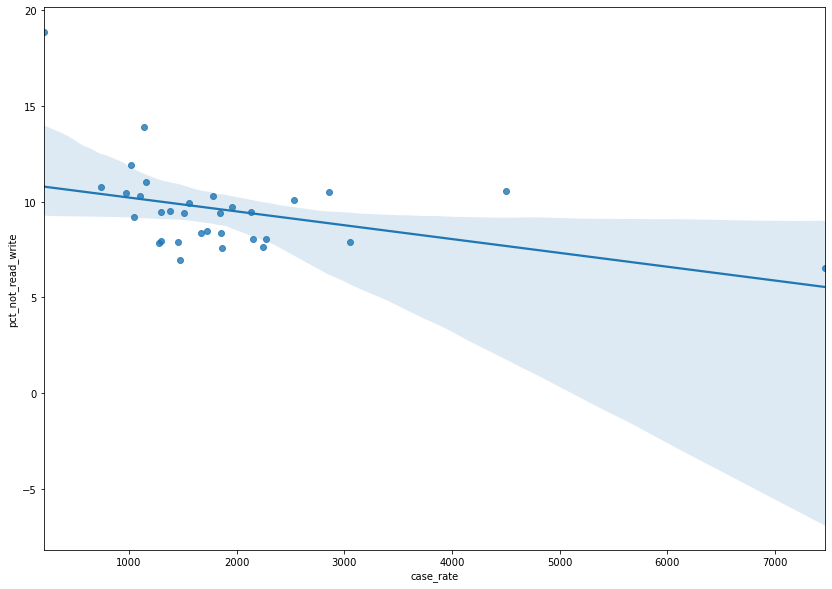

In [15]:
plt.figure(figsize=(14,10))
sns.regplot(x="case_rate", y="pct_not_read_write", data=dfAll)
sns.set_context('paper', font_scale=2)

This correlation behaviour is negative meaning that the population of the states who can't read are less likely to contract the disease

## Correlation plot between the percentage of people who can read/write and the case rate

The correlation between the percentage of people who can write and read with the cases rate

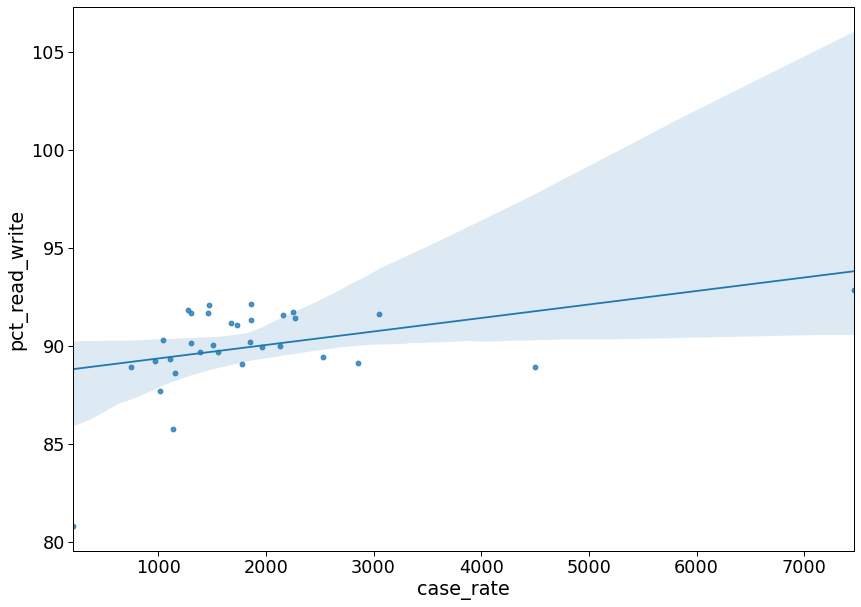

In [16]:
plt.figure(figsize=(14,10))
sns.regplot(x="case_rate", y="pct_read_write", data=dfAll)
sns.set_context('paper', font_scale=2)

This correlation behaviour is negative meaning that the population of the states who can read are more likely to contract the disease

Finally the data of this week analyzes is selected for storage

In [17]:
dfFinal = dfAll[['cve_ent','state','pct_read_write', 'pct_not_read_write']].copy()
dfFinal

,cve_ent,state,pct_read_write,pct_not_read_write
0,1,AGUASCALIENTES,92.112513,7.577890
1,2,BAJA CALIFORNIA,89.678697,9.511626
2,3,BAJA CALIFORNIA SUR,88.917670,10.542815
3,4,CAMPECHE,89.288047,10.283008
4,5,COAHUILA,91.559805,8.028859
5,6,COLIMA,89.682802,9.917492
6,7,CHIAPAS,80.801686,18.898393
7,8,CHIHUAHUA,90.042903,9.418972
8,9,DISTRITO FEDERAL,92.839593,6.517517
9,10,DURANGO,90.200858,9.423542


The data analyzes of this week is stored.

In [18]:
dfFinal.to_csv('../data/week2analyzesStates.csv',index=False)